In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [5]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [7]:
train_scaled.shape

(48000, 28, 28, 1)

In [8]:
model = keras.Sequential()
model.add(
    keras.layers.Conv2D(
        32, 
        kernel_size=3, 
        activation='relu', 
        padding='same',
        input_shape=(28, 28, 1)
    )
)

C:\Users\2-12\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(keras.layers.MaxPooling2D(2))

In [10]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [11]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 28, 28, 32)         │            320 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 14, 14, 32)         │              0 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 14, 14, 64)         │         18,496 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 7, 7, 64)           │              0 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ flatten (Flatten)                  │ (None, 3136)               │              0 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense (Dense)                      │ (None, 100)                │        313,700 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dropout (Dropout)                  │ (None, 100)                │              0 │
├────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_1 (Dense)                    │ (None, 10)                 │          1,010 │
└────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cp_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
histroy = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[cp_cb, es_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7502 - loss: 0.7080 - val_accuracy: 0.8793 - val_loss: 0.3308
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8724 - loss: 0.3534 - val_accuracy: 0.8942 - val_loss: 0.2821
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8942 - loss: 0.2939 - val_accuracy: 0.9094 - val_loss: 0.2521
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9003 - loss: 0.2737 - val_accuracy: 0.9020 - val_loss: 0.2581
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9154 - loss: 0.2367 - val_accuracy: 0.9153 - val_loss: 0.2256
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9197 - loss: 0.2145 - val_accuracy: 0.9162 - val_loss: 0.2256
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9282 - loss: 0.1989 - val_accuracy: 0.9187 - val_loss: 0.2301


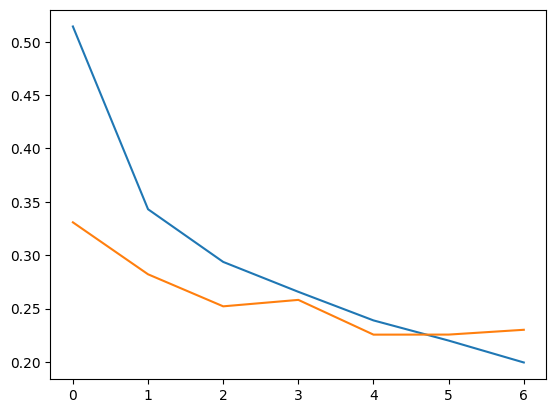

In [18]:
import matplotlib.pyplot as plt
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.show()


In [19]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9187 - loss: 0.2179


[0.22557765245437622, 0.9153333306312561]

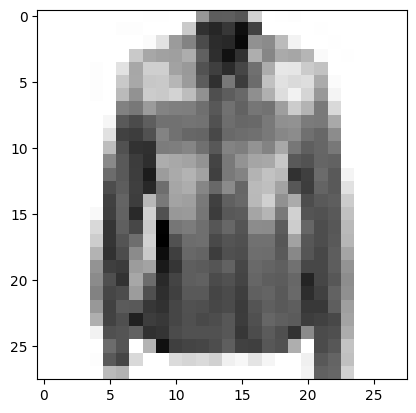

In [31]:
plt.imshow(val_scaled[3].reshape(28, 28), cmap='gray_r')
plt.show()

In [29]:
import numpy as np
np.round(model.predict(val_scaled[:5]), decimals=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0.38, 0.  , 0.  , 0.61, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.61, 0.  , 0.38, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [33]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9081 - loss: 0.2496


[0.24303534626960754, 0.9085999727249146]